In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csvFile = "./datasets/city-ditties.csv"

In [159]:
companiesDF = pd.read_csv(csvFile)
companiesDF.describe()

,raised_amount_usd
count,4.870000e+02
mean,1.065261e+07
std,2.337269e+07
min,5.000000e+03
25%,1.100000e+06
50%,3.000000e+06
75%,1.050000e+07
max,2.000000e+08


(array([ 375.,   40.,   46.,    6.,    7.,    3.,    0.,    0.,    0.,    6.]),
 array([  5.00000000e+03,   1.12045000e+07,   2.24040000e+07,
          3.36035000e+07,   4.48030000e+07,   5.60025000e+07,
          6.72020000e+07,   7.84015000e+07,   8.96010000e+07,
          1.00800500e+08,   1.12000000e+08]),
 <a list of 10 Patch objects>)

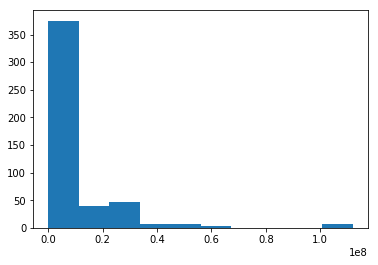

In [160]:
fundingDF = companiesDF[companiesDF["raised_amount_usd"] < 150000000]["raised_amount_usd"]
plt.hist(fundingDF)

In [161]:
import random
def get_sample(dataset, n=30):
     return np.random.choice(dataset, n)

def create_sample_distribution(dataset, size=1000):
    """Creates a dataset of subsample means.  The length of the dataset is specified by the 'size' 
    keyword argument. Should return the entire sample distribution as a numpy array.  """
    meanList = []
    for i in range(0, size):
        sample = get_sample(dataset)
        meanList.append(sample.mean())
    return np.array(meanList)

(array([  35.,  177.,  273.,  210.,  156.,   96.,   37.,    6.,    7.,    3.]),
 array([  2900433.33333333,   4780523.33333333,   6660613.33333333,
          8540703.33333333,  10420793.33333333,  12300883.33333333,
         14180973.33333333,  16061063.33333333,  17941153.33333333,
         19821243.33333333,  21701333.33333333]),
 <a list of 10 Patch objects>)

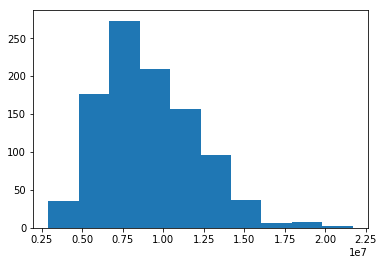

In [162]:
samp_dist = create_sample_distribution(fundingDF)
plt.hist(samp_dist)

In [164]:
import scipy.stats as scp
limit1 = 25000000
limit2 = 30000000
mean = np.mean(samp_dist)
std = np.std(samp_dist)
z1 = (limit1 - mean) / std
z2 = (limit2 - mean) / std
prob2 = scp.norm.cdf(z2)
prob1 = scp.norm.cdf(z1)
prob = prob2 - prob1
prob

3.4582989028031363e-08